In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import seaborn as sns
%matplotlib inline

In [57]:
file_test = r'C:\Users\NIC\Desktop\DC竞赛-员工离职预测训练赛\员工离职预测训练赛\pfm_test.csv'
file_train = r'C:\Users\NIC\Desktop\DC竞赛-员工离职预测训练赛\员工离职预测训练赛\pfm_train.csv'

test_df = pd.read_csv(file_test,engine = 'python')
train_df = pd.read_csv(file_train,engine = 'python')

In [58]:
train_df.describe()

,锘緼ge,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.999091,0.161818,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,...,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,9.037230,0.368451,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,...,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [59]:
train_df = train_df.drop(['Over18', 'EmployeeNumber', 'StandardHours'], axis = 1)

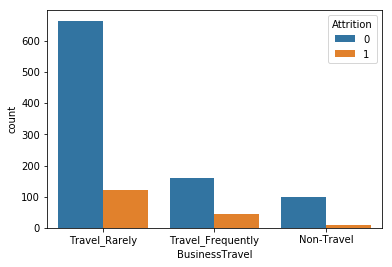

In [60]:
sns.countplot(x='BusinessTravel', hue='Attrition', data = train_df)

In [61]:
train_df['Department'].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [62]:
train_df['Attrition'].value_counts()

0    922
1    178
Name: Attrition, dtype: int64

Text(0,0.5,'Frequency of Turnover')

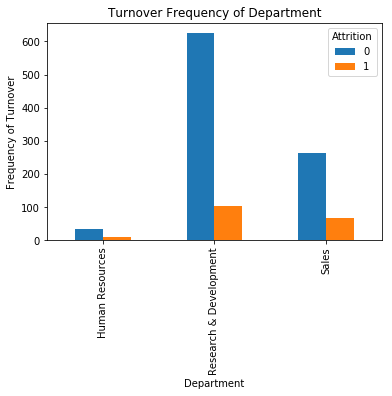

In [63]:
pd.crosstab(train_df.Department, train_df.Attrition).plot(kind = 'bar')
plt.title('Turnover Frequency of Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')

Text(0,0.5,'Proportion of Employees')

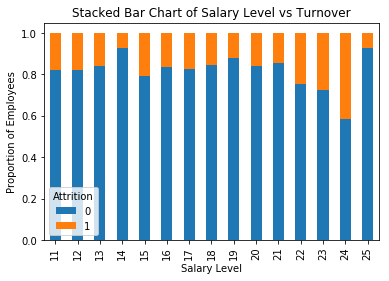

In [64]:
table = pd.crosstab(train_df.PercentSalaryHike, train_df.Attrition)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')

In [65]:
train_df.PercentSalaryHike.unique()

array([18, 17, 24, 16, 15, 12, 13, 21, 11, 14, 20, 19, 22, 23, 25],
      dtype=int64)

In [66]:
train_df.shape
train_df.columns

Index(['锘緼ge', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [67]:
train_df.OverTime.replace('Yes', 1, inplace = True)
train_df.OverTime.replace('No', 0, inplace = True)

In [68]:
train_df.BusinessTravel.replace('Non-Travel', 1, inplace = True)
train_df.BusinessTravel.replace('Travel_Rarely', 2, inplace = True)
train_df.BusinessTravel.replace('Travel_Frequently', 3, inplace = True)

In [69]:
train_df.BusinessTravel.unique()

array([2, 3, 1], dtype=int64)

In [70]:
cat_vars = ['Department']
for var in cat_vars:
    cat_list1 = pd.get_dummies(train_df[var], prefix=var)
    hr1 = train_df.join(cat_list1)
train_df = hr1
cat_vars = [ 'MaritalStatus']
for var in cat_vars:
    cat_list2 = pd.get_dummies(train_df[var], prefix=var)
    hr2 = train_df.join(cat_list2)
train_df = hr2
cat_vars = [ 'JobRole']
for var in cat_vars:
    cat_list3 = pd.get_dummies(train_df[var], prefix=var)
    hr3 = train_df.join(cat_list3)
train_df = hr3

In [71]:
drop_cols = ['Department', 'MaritalStatus', 'JobRole', 'EducationField']
train_df.drop(columns = drop_cols, inplace = True)
train_df.columns

Index(['锘緼ge', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative'],
      dtype='obj

In [72]:
train_df.Gender.replace('Male', 0, inplace = True)
train_df.Gender.replace('Female', 1, inplace = True)

In [73]:
len(train_df.columns.tolist())

39

In [74]:
train_df.columns

Index(['锘緼ge', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative'],
      dtype='obj

In [75]:
hr_vars = train_df.columns.values.tolist()
y = ['Attrition']
x = [i for i in hr_vars if i not in y]

In [76]:
hr = train_df
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 39 columns):
锘緼ge                                 1100 non-null int64
Attrition                            1100 non-null int64
BusinessTravel                       1100 non-null int64
DistanceFromHome                     1100 non-null int64
Education                            1100 non-null int64
EnvironmentSatisfaction              1100 non-null int64
Gender                               1100 non-null int64
JobInvolvement                       1100 non-null int64
JobLevel                             1100 non-null int64
JobSatisfaction                      1100 non-null int64
MonthlyIncome                        1100 non-null int64
NumCompaniesWorked                   1100 non-null int64
OverTime                             1100 non-null int64
PercentSalaryHike                    1100 non-null int64
PerformanceRating                    1100 non-null int64
RelationshipSatisfaction             1

In [77]:
#hr = train_df
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 15)
rfe = rfe.fit(hr[x], hr[y])
print(rfe.support_)
print(rfe.ranking_)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False  True False False  True  True  True False  True False False  True
 False False False False False False  True False False False False False
 False False  True False  True  True  True  True False  True  True False
 False  True]
[21  1 20 16  1  1  1 19  1 24  8  1 23  3  4  6 12  7  1 14  5  9 13 10
 17  2  1 11  1  1  1  1 15  1  1 18 22  1]


In [78]:
hr.columns

Index(['锘緼ge', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative'],
      dtype='obj

In [79]:
len(hr.columns)

39

In [80]:
cols = ['BusinessTravel', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobSatisfaction',
        'OverTime','WorkLifeBalance', 'MaritalStatus_Divorced', 'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manufacturing Director',
       'JobRole_Research Director','JobRole_Sales Representative'
       ]
x = hr[cols]
y = hr['Attrition']

In [81]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.219, random_state = 0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy:{:.6f}'.format(accuracy_score(y_test, logreg.predict(x_test))))

Logistic regression accuracy:0.896266


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Random Forest Accuracy:{:.5f}'.format(accuracy_score(y_test, rf.predict(x_test))))

Random Forest Accuracy:0.83402


In [84]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
print('Support vector machine accuracy:{:.5f}'.format(accuracy_score(y_test, svc.predict(x_test))))

Support vector machine accuracy:0.86307


In [85]:
print(SVC())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [86]:
from sklearn.externals import joblib
c = joblib.dump(logreg,r'C:\Users\NIC\Desktop\DC竞赛-员工离职预测训练赛\离职的模型\logreg_1_2.m')

In [87]:
#特征:
cat_vars = ['Department']
for var in cat_vars:
    cat_list1 = pd.get_dummies(test_df[var], prefix=var)
    hr1 = test_df.join(cat_list1)
test_df = hr1
cat_vars = [ 'MaritalStatus']
for var in cat_vars:
    cat_list2 = pd.get_dummies(test_df[var], prefix=var)
    hr2 = test_df.join(cat_list2)
test_df = hr2
cat_vars = [ 'JobRole']
for var in cat_vars:
    cat_list3 = pd.get_dummies(test_df[var], prefix=var)
    hr3 = test_df.join(cat_list3)
test_df = hr3
drop_cols = ['Department', 'MaritalStatus', 'JobRole', 'EducationField']
test_df.drop(columns = drop_cols, inplace = True)

In [88]:
test_df.Gender.replace('Male', 0, inplace = True)
test_df.Gender.replace('Female', 1, inplace = True)

In [89]:
test_df.BusinessTravel.replace('Non-Travel', 1, inplace = True)
test_df.BusinessTravel.replace('Travel_Rarely', 2, inplace = True)
test_df.BusinessTravel.replace('Travel_Frequently', 3, inplace = True)

In [90]:
test_df.OverTime.replace('Yes', 1, inplace = True)
test_df.OverTime.replace('No', 0, inplace = True)

In [91]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 41 columns):
锘緼ge                                 350 non-null int64
BusinessTravel                       350 non-null int64
DistanceFromHome                     350 non-null int64
Education                            350 non-null int64
EmployeeNumber                       350 non-null int64
EnvironmentSatisfaction              350 non-null int64
Gender                               350 non-null int64
JobInvolvement                       350 non-null int64
JobLevel                             350 non-null int64
JobSatisfaction                      350 non-null int64
MonthlyIncome                        350 non-null int64
NumCompaniesWorked                   350 non-null int64
Over18                               350 non-null object
OverTime                             350 non-null int64
PercentSalaryHike                    350 non-null int64
PerformanceRating                    350 non-null int6

In [92]:
d = joblib.load(r'C:\Users\NIC\Desktop\DC竞赛-员工离职预测训练赛\离职的模型\logreg_1_2.m')
xx = test_df[cols]
e = d.predict(xx)
print(list(e))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [93]:
print(e)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [94]:
dic_ss = {'a':e}
df_res = pd.DataFrame(dic_ss)
df_res.to_csv(r'C:\Users\NIC\Desktop\DC竞赛-员工离职预测训练赛\results\1_2.csv')